### Autoencoder

In [ ]:
import keras
from keras import layers

In [ ]:
encoding_dim = 32  

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 5ms/step - loss: 0.2758 - val_loss: 0.1888
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1708 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1449 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1296 - val_loss: 0.1224
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1196 - val_loss: 0.1140
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1125 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1074 - val_loss: 0.1038
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1037 - val_loss: 0.1008
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1010 - val_loss: 0.0985
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0991 - val_loss: 0.0969

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


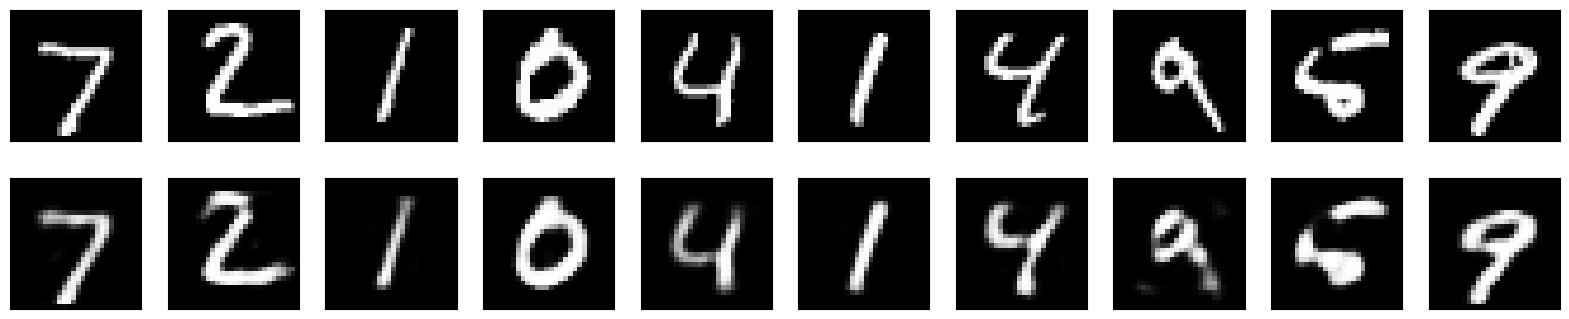

In [ ]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
     

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2865 - val_loss: 0.1976
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1775 - val_loss: 0.1604
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1523 - val_loss: 0.1427
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1381 - val_loss: 0.1312
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1285 - val_loss: 0.1233
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1217 - val_loss: 0.1175
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1167 - val_loss: 0.1133
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1130 - val_loss: 0.1104
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1105 - val_loss: 0.1083
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1088 - val_loss: 0.1068

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


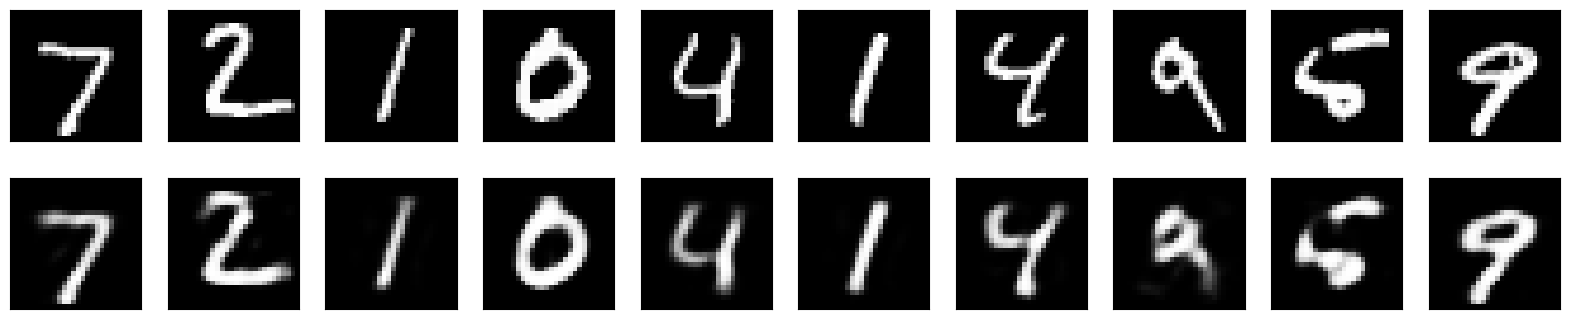

In [ ]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


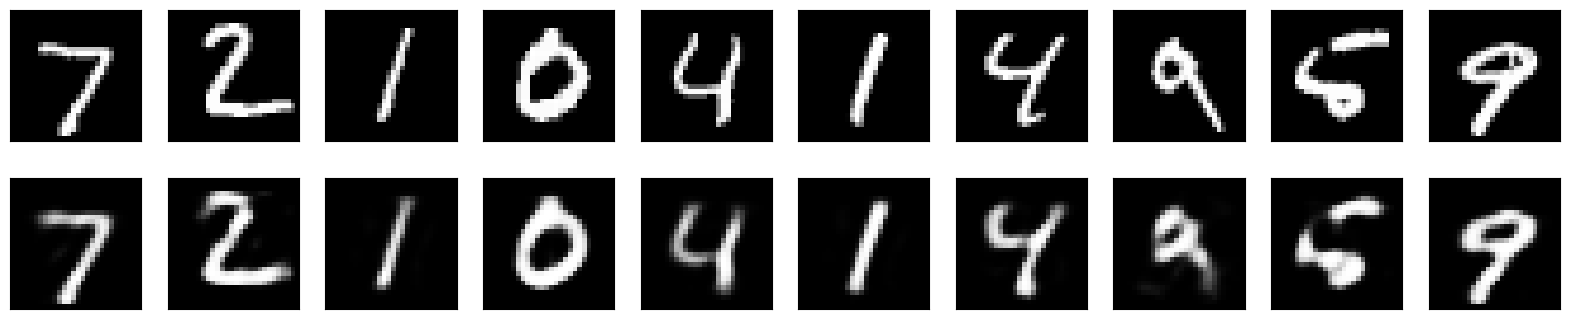

In [ ]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()